In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

plt.rcParams.update({'font.size': 15})
fig_size = (20, 10)
annotation_font_size = 11
axes = []
def display(df, c_filter, title, normalize=False, mean=True, ignore='', dropna=True, fp=2):
    columns = [c for c in df.columns if c_filter in c]
    if ignore:
        columns = [c for c in columns if ignore not in c]
    gd = df[columns]
    gd.set_index(df['epoch'], inplace=True)

    if dropna:
        gd = gd.dropna()
    if mean:
        gd = gd.groupby('epoch').mean()
    if normalize:
        gd = (gd-gd.min())/(gd.max()-gd.min())

    ax = gd.plot(figsize=fig_size, title=title)
    for c in columns:
        last_epoch = gd.index[-1]
        last_value = gd.at[last_epoch, c]
        if last_value:
            ax.annotate(f'{last_value:.{fp}f}', xy=(last_epoch, last_value), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmin(), gd[c].min()
        ax.annotate(f'{y:.{fp}f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmax(), gd[c].max()
        ax.annotate(f'{y:.{fp}f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

    axes.append(ax)

def apply_shifted_episode_lengths(df, colname):
    breakpoint()
    s = df[colname].reset_index(drop=True)
    episode_ids = s
    change_points = (episode_ids != episode_ids.shift()).cumsum()
    lengths = episode_ids.groupby(change_points).transform('count')

    # Compute episode lengths per group
    groups = episode_ids.groupby(change_points)
    group_lens = groups.size().tolist()
    shifted_lens = group_lens[1:] + [group_lens[-1]]  # Shift left, last keeps its own length

    # Broadcast shifted lengths to each row
    expanded = pd.Series(dtype=int)
    for i, l in enumerate(shifted_lens):
        expanded = pd.concat([expanded, pd.Series([s[i]]*group_lens[i])], ignore_index=True)

    df[colname + "_shifted_len"] = expanded.astype(int)
    return df

In [577]:
model = '2025-09-07-0759'
!mkdir -p ~/Documents/UFF/mestrado/2o\ Sem/EO/gnn-co/experiments/{model}/version_0
!scp -r osnielteixeira2@200.20.15.153:~/experiments/{model}/version_0/metrics.csv ~/Documents/UFF/mestrado/2o\ Sem/EO/gnn-co/experiments/{model}/version_0/
!scp -r osnielteixeira2@200.20.15.153:~/experiments/{model}/params.pt ~/Documents/UFF/mestrado/2o\ Sem/EO/gnn-co/experiments/{model}/

metrics.csv                                   100%   96KB   2.1MB/s   00:00    
params.pt                                     100%  559    30.6KB/s   00:00    


In [578]:
torch.load(f'../experiments/{model}/params.pt')

{'rl_alg': 'DQN',
 'batch_size': 5000,
 'devices': 1,
 'p': 0.15,
 'n': 50,
 'delta_n': 50,
 's': 10000,
 'v': 800,
 'problem': 'mds',
 'attr': True}

In [579]:
metrics_path = f'../experiments/{model}/version_0/metrics.csv'
metrics = pd.read_csv(metrics_path)

In [580]:
s_metrics = -metrics*100
s_metrics.epoch = metrics.epoch
# s_metrics['avg_return'] = s_metrics.avg_ep_reward
# s_metrics['avg_return ma'] = s_metrics.rolling(window=20)['avg_return'].mean()
metrics.drop('reward', axis=1, inplace=True)
# metrics = apply_shifted_episo"de_lengths(metrics, 'total_reward')

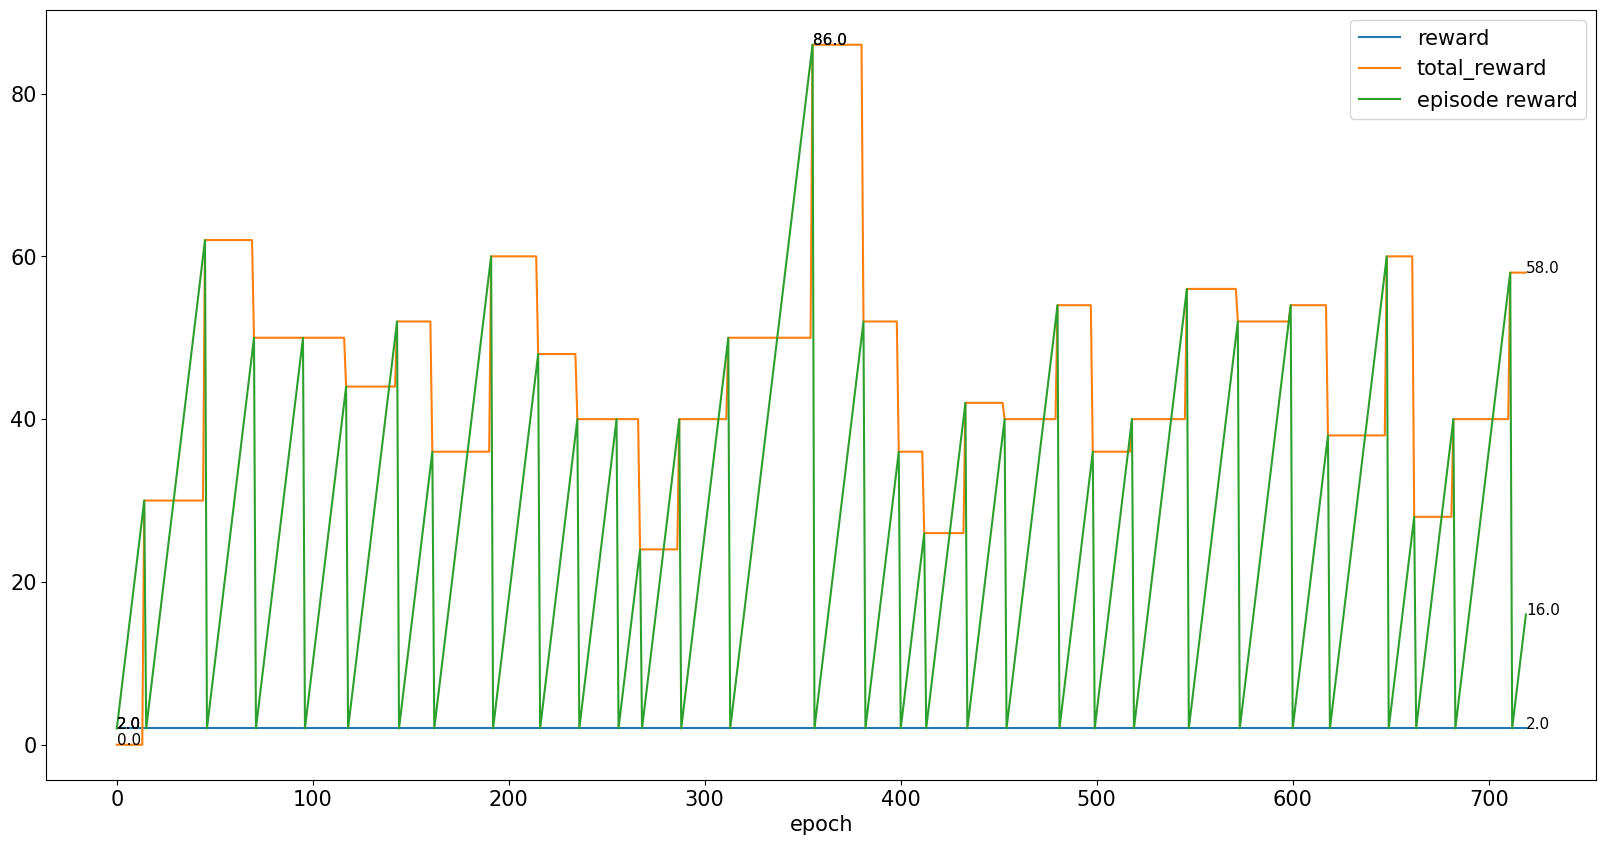

In [581]:
display(s_metrics, 'reward', '', ignore='val', fp=1)

In [582]:
 # display(metrics, 'aon', 'All or Nothing')

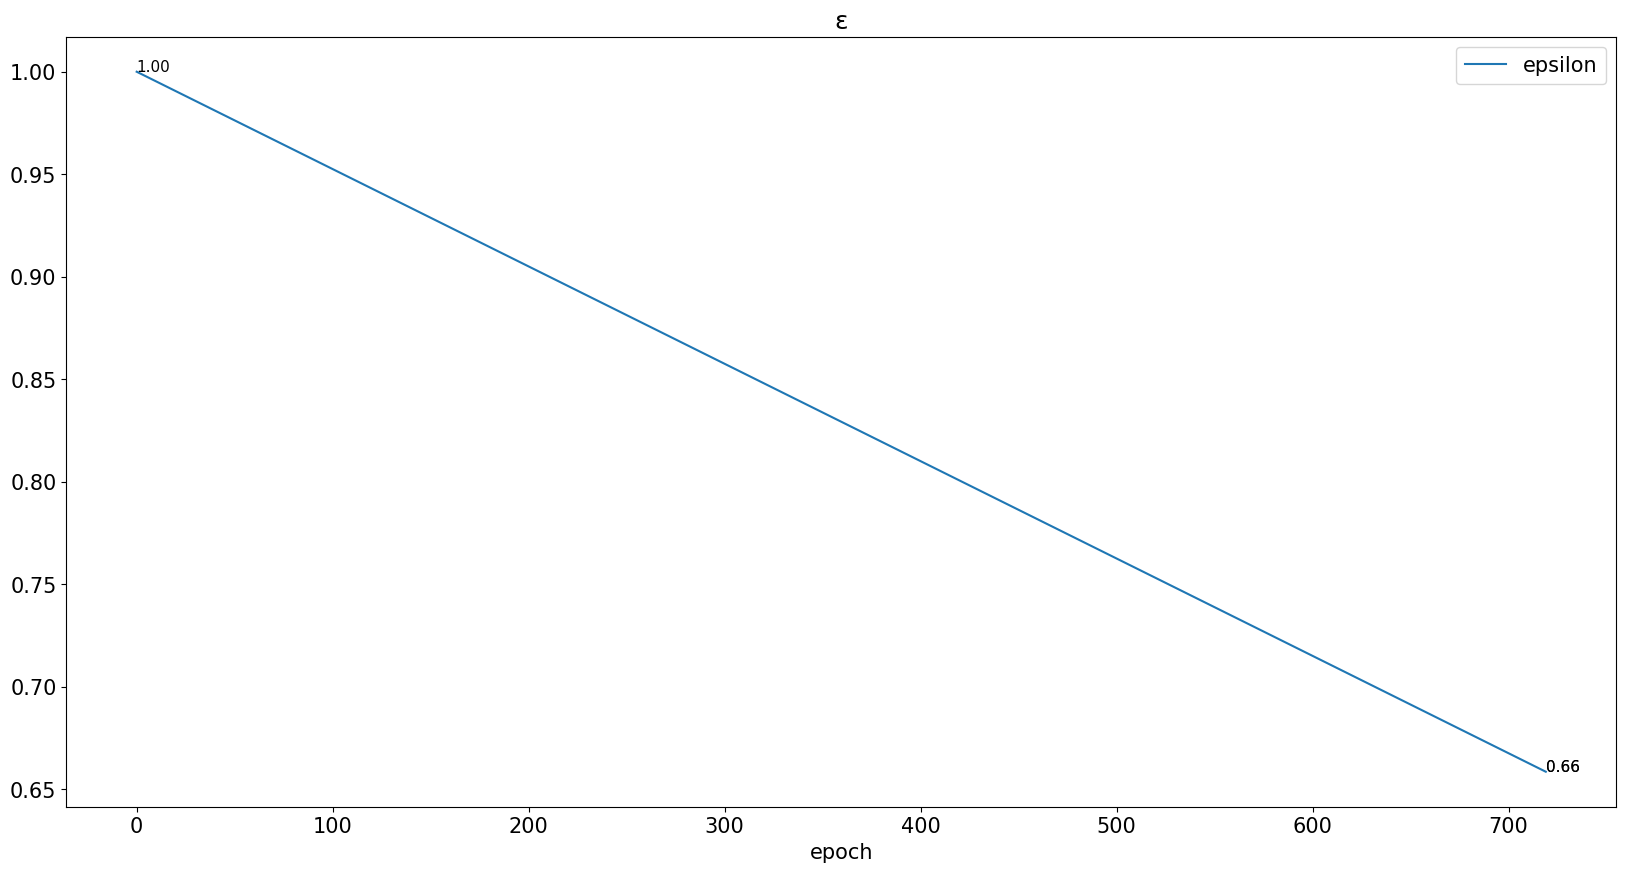

In [583]:
display(metrics, 'epsilon', 'ε')

In [584]:
# display(metrics, 'loss_actor', 'Loss Actor', fp=10)

In [585]:
# display(metrics, 'loss_critic', 'Loss Critic', fp=4)

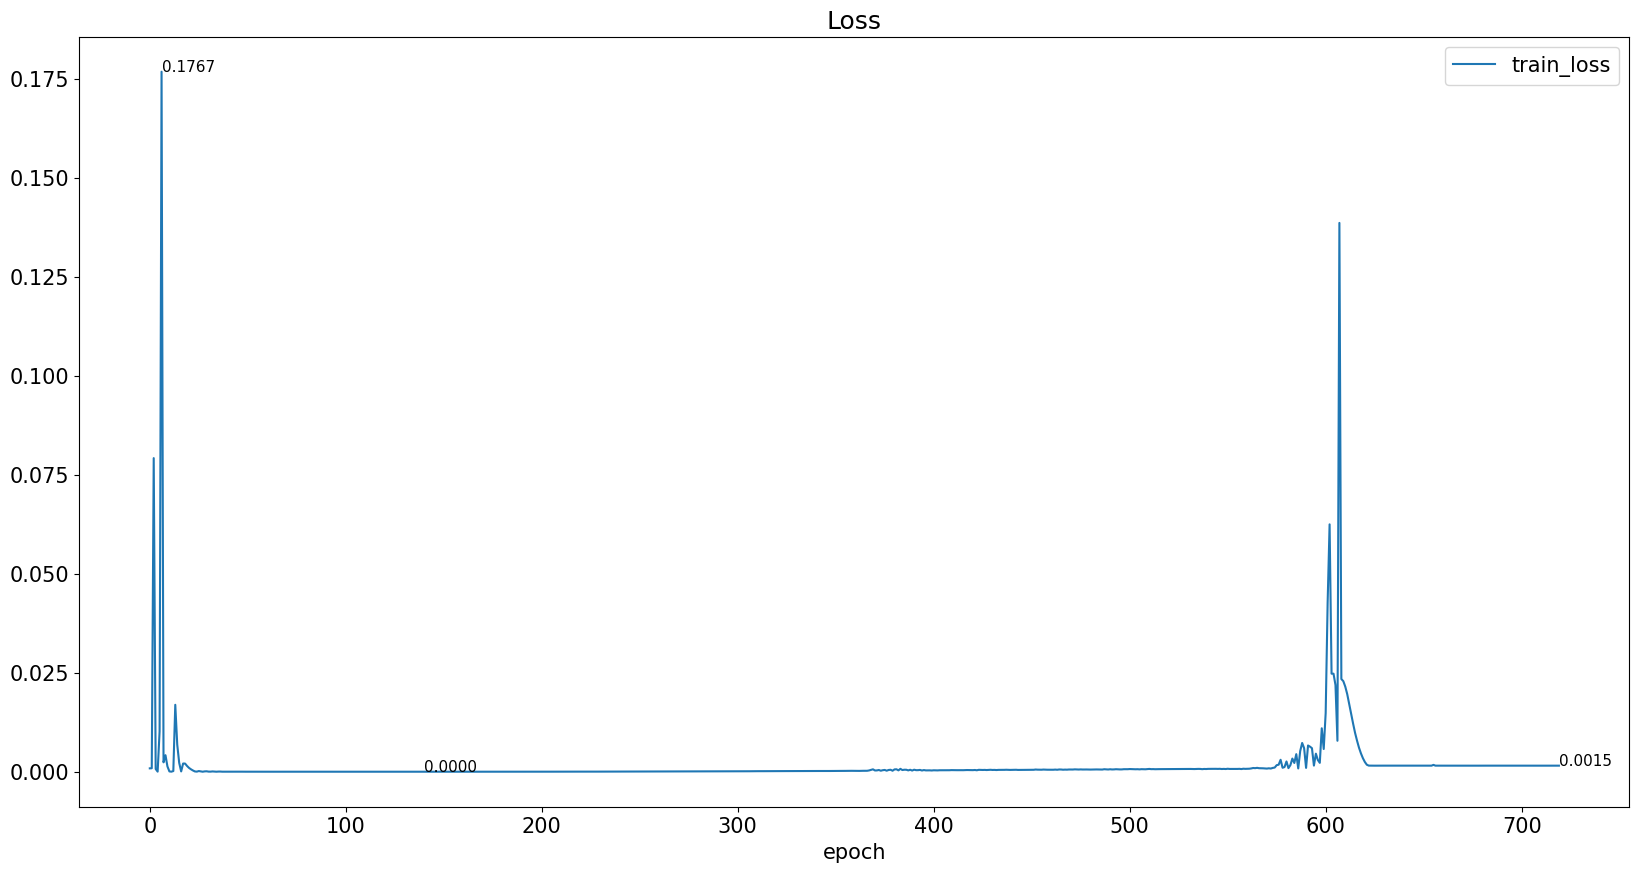

In [586]:
display(metrics, 'loss', 'Loss', fp=4)

In [587]:
#display(metrics, 'val', 'Validation', fp=2)

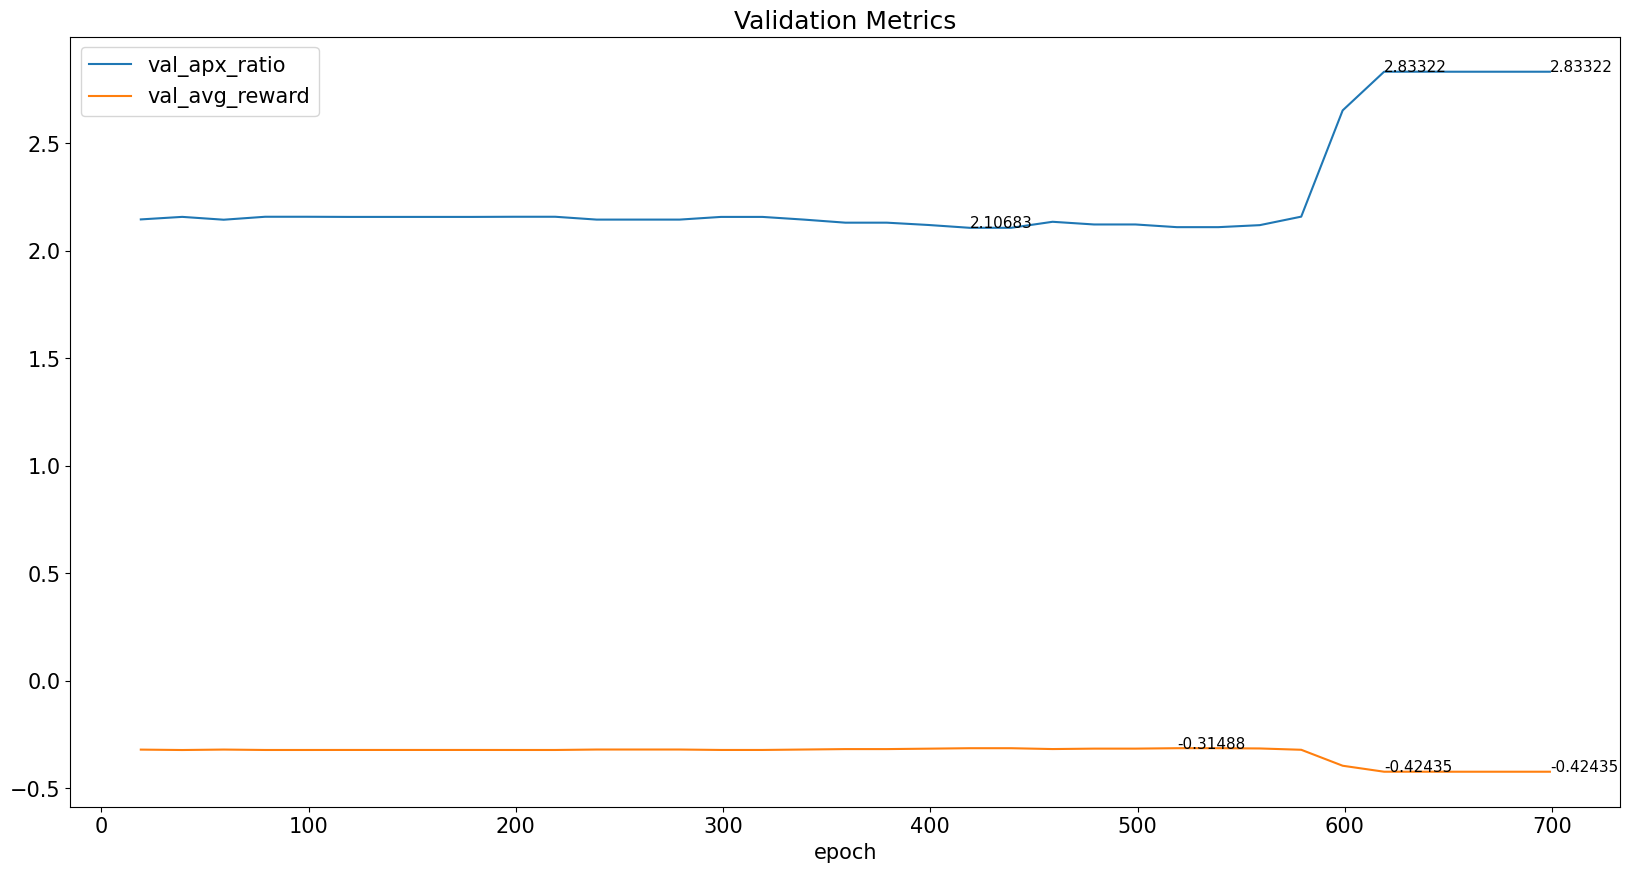

In [588]:
display(metrics, 'val', 'Validation Metrics', fp=5)

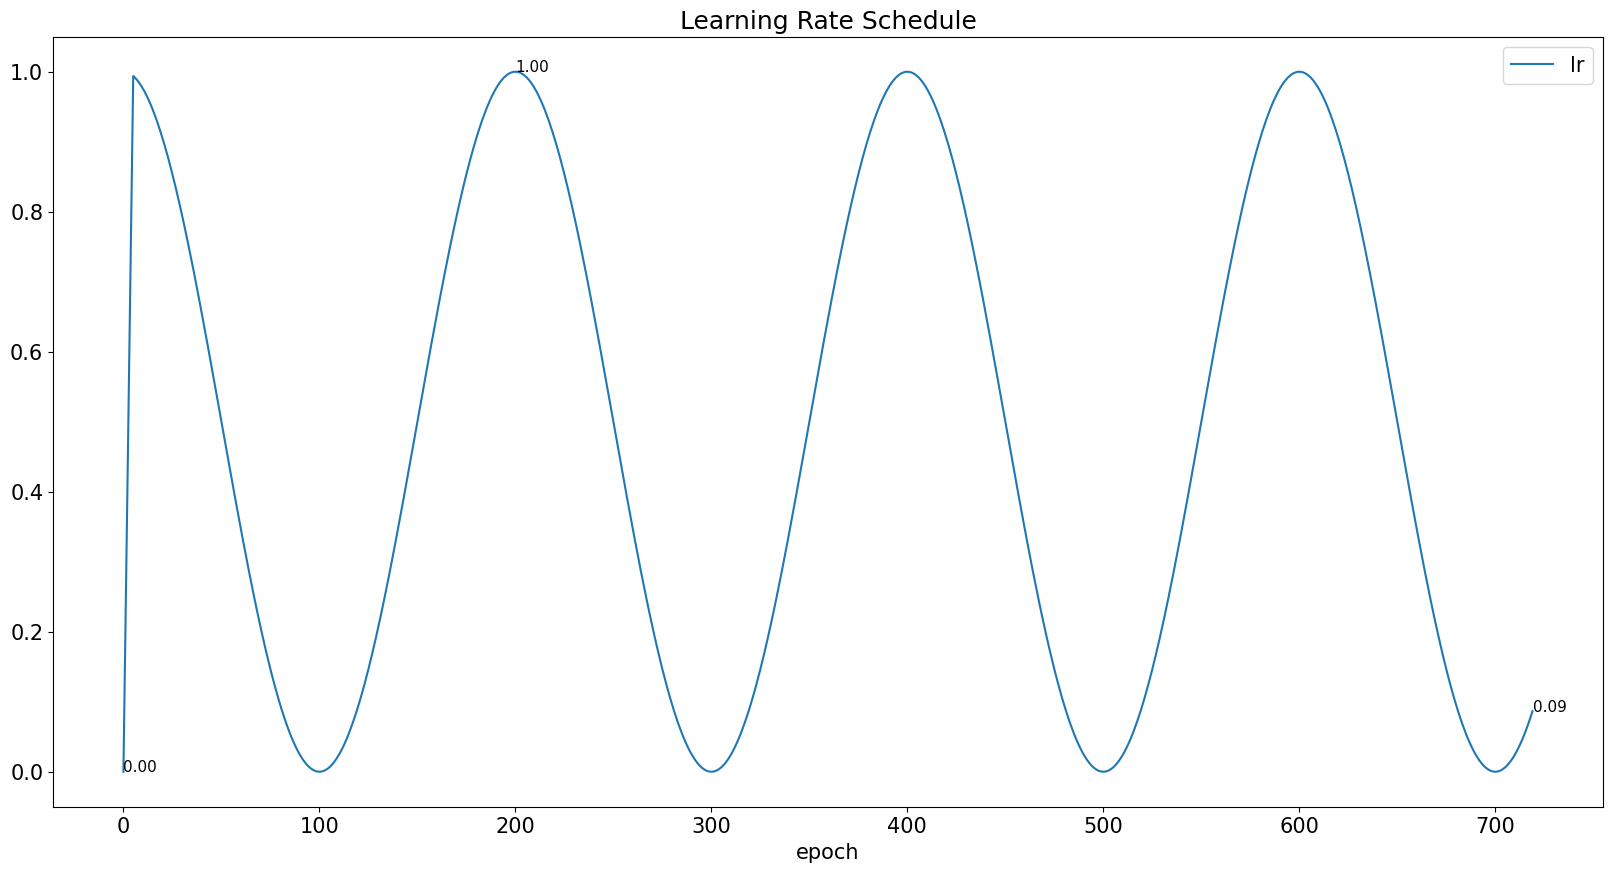

In [589]:
display(metrics, 'lr', 'Learning Rate Schedule', normalize=True)

In [590]:
for ax in axes:
    plt.close(ax.get_figure())

In [591]:
#metrics['val_avg_reward' != None]